# **`LOGISTIC REGRESION`**

### `IMPORTING LIBRARIES`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import pickle
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
import seaborn as sns

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### `VISUALIZING THE DATASET`

In [3]:
dataset=pd.read_csv('train.csv')

In [4]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
dataset=dataset.drop('id',axis=1)

In [6]:
dataset.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
dataset.info()
print(len(dataset))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB
31962


In [8]:
dataset['label'].unique()

array([0, 1], dtype=int64)

### `PREPROCESSING DATA`

In [9]:
dataset_pos=dataset[dataset['label']==1]
dataset_neg=dataset[dataset['label']==0]

In [10]:
dataset_pos.head()

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...


In [11]:
dataset_neg.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
dataset_pos=dataset_pos[:20000]
dataset_neg=dataset_neg[:20000]

In [13]:
dataset_pos.tail()

,label,tweet
31934,1,lady banned from kentucky mall. @user #jcpenn...
31946,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,1,@user @user you don't have the balls to hashta...
31948,1,"makes you ask yourself, who am i? then am i a..."
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [14]:
dataset_neg.tail()

,label,tweet
21482,0,finding life inside the illusion. for d lack o...
21483,0,there are some cold heaed people in this world...
21484,0,@user is basically an incompetent mental retar...
21486,0,"fuck land, i'm on a boat, motherfucker! âµï¸..."
21487,0,#altwaystoheal #healthy #peace !! !! thin...


In [15]:
dataset=pd.concat([dataset_pos,dataset_neg])

In [16]:
dataset.head()

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...


In [17]:
stop_words=stopwords.words('english')
punctuation_list=list(string.punctuation)

In [18]:
def preprocess(text):
  text=str(text).lower()
  text=re.sub(r'https?:\/\/\S+', '', text)
  text=re.sub(r'{link}', '', text)
  text=re.sub(r'&[a-z]+;', '', text)
  text=re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', text)
  text=re.sub(r'@mention', '', text)
  text=re.sub(r'#','',text)
  words=[w for w in text.split() if w not in stop_words]
  words=[PorterStemmer().stem(w) for w in words]
  words=[w for w in words if w not in punctuation_list]
  return words
  


In [19]:
dataset.tweet=dataset.tweet.apply(lambda x: preprocess(x))

In [20]:
dataset.head(20)

,label,tweet
13,1,"[user, cnn, call, michigan, middl, school, 'bu..."
14,1,"[comment, australia, opkillingbay, seashepherd..."
17,1,"[retweet, agre]"
23,1,"[user, user, lumpi, say, prove, lumpi]"
34,1,"[unbeliev, st, centuri, we'd, need, someth, li..."
56,1,"[user, let, fight, love, peac]"
68,1,"[white, establish, can't, blk, folx, run, arou..."
77,1,"[user, hey, white, people:, call, peopl, 'whit..."
82,1,"[altright, use, insecur, lure, men, whitesupre..."
111,1,"[user, i'm, interest, linguist, address, race,..."


In [21]:
dataset.tail(20)

,label,tweet
21466,0,"[user, user, first, time, second, u, lol]"
21467,0,"[fathersday, let', work, toward, delegaterevol..."
21468,0,"[user, real, now:, play, user, czech, republ, ..."
21469,0,"[medit, gorilla, simulator:, need, adapt, envi..."
21470,0,"[write, write, qout, primari, namibianpoet, am..."
21471,0,"[thing, mani, book, book, love, sunday]"
21472,0,"[user, actual, good, song, feel, need, listen,..."
21473,0,"[user, i'm, grate, affirm]"
21474,0,"[moment, orlando:, shoot, fatal, injuri, chris..."
21475,0,"[alway, someth, new, learn, feel, sunday, suny..."


## `TESTING AND TRAINING DATA`

In [22]:
x=dataset['tweet']
y=dataset['label']

In [23]:
x

13       [user, cnn, call, michigan, middl, school, 'bu...
14       [comment, australia, opkillingbay, seashepherd...
17                                         [retweet, agre]
23                  [user, user, lumpi, say, prove, lumpi]
34       [unbeliev, st, centuri, we'd, need, someth, li...
                               ...                        
21482              [find, life, insid, illus, lack, choic]
21483    [cold, hea, peopl, world, anyth, get, top, peo...
21484    [user, basic, incompet, mental, retardo, lose,...
21486    [fuck, land, i'm, boat, motherfuck, lonelyisla...
21487     [altwaystoh, healthi, peac, think, altern, idwp]
Name: tweet, Length: 22242, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=1)

In [25]:
vocabulary_size = 5000
count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
x_train = count_vector.fit_transform(x_train).toarray()
x_test = count_vector.transform(x_test).toarray()

In [26]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', dataset['tweet'][0])
X, tokenizer = tokenize_pad_sequences(dataset['tweet'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']
After Tokenization & Padding 
 [   1 1351  132 4986 1254  148 4194 3618 1414    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [27]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

#### `FUNCTION FOR DETERMING ACCURACY`

In [28]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## `LOGISTIC REGRESSION`

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       986
           1       0.81      0.56      0.66       127

    accuracy                           0.93      1113
   macro avg       0.88      0.77      0.81      1113
weighted avg       0.93      0.93      0.93      1113



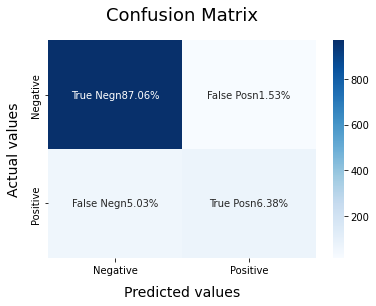

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=2,max_iter=1000,n_jobs=-1)
lr.fit(x_train,y_train)
model_Evaluate(lr)
y_pred3=lr.predict(x_train)

In [34]:
filename='final_lr_model.sav'
pickle.dump(lr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(x_test,y_test)

In [35]:
result

0.9344115004492363